In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras import optimizers
from keras.optimizers import Adam 
from keras import regularizers
from keras import layers
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


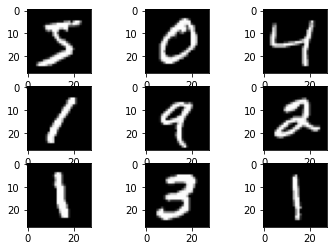

In [2]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [3]:
# reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
print(train_images.shape)

print(test_images.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#CNN
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
	# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	

In [7]:
#Training

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), verbose=2, callbacks=[learning_rate_reduction])
		


Epoch 1/10
1875/1875 - 6s - loss: 0.2280 - accuracy: 0.9298 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 - 6s - loss: 0.1004 - accuracy: 0.9695 - val_loss: 0.0419 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 - 6s - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0355 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 - 6s - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0331 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 - 6s - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0309 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 - 6s - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0296 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 - 6s - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.0261 - val_accuracy: 0.9909
Epoch 8/10
1875/1875 - 6s - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 9/10
1875/1875 - 6s - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0295 - val_accuracy: 0.9913
Epoch 10/10
1875/1875 - 6s - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0283 - 

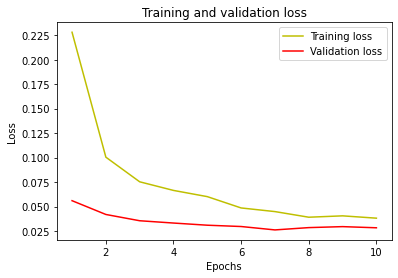

In [8]:
#plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

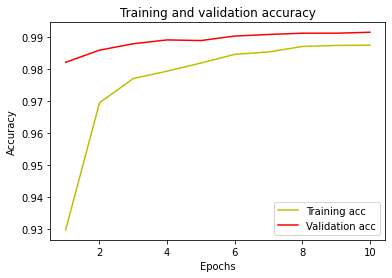

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
!mkdir -p saved_model

In [11]:
model.save('saved_model/mmnst.h5') 

In [13]:
from keras.models import load_model
model = load_model('/content/saved_model/mmnst.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [17]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [37]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_images[0]

In [46]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

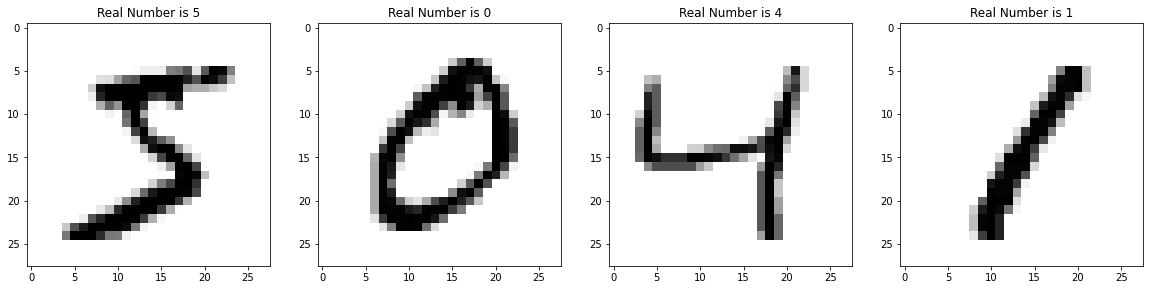

In [47]:
X_train__ = train_images.reshape(train_images.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = train_labels[i].argmax()
    ax.set(title = f"Real Number is {digit}");

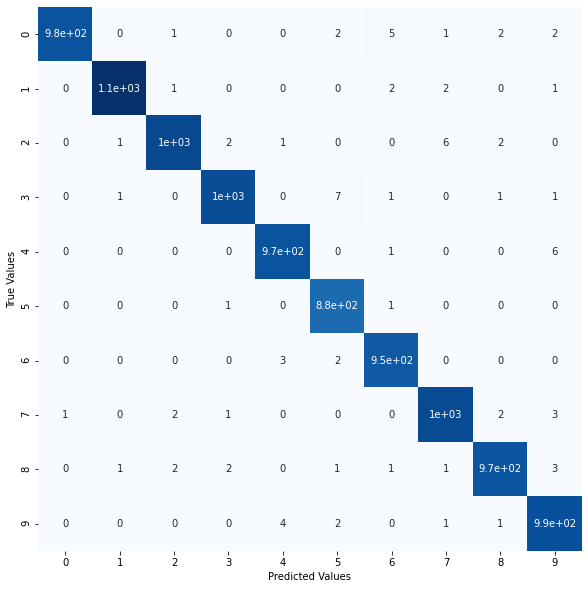

In [58]:
# confusion matrix
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

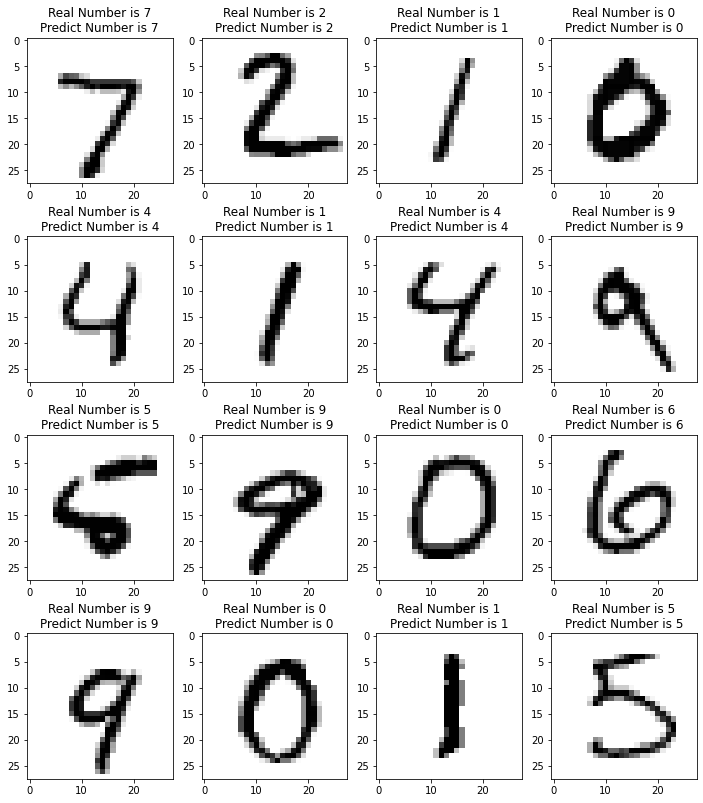

In [60]:
y_pred = model.predict(test_images)
X_test__ = test_images.reshape(test_images.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {test_labels[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [66]:
from keras import models
layer_outputs = [for layer in model.layers[:1]:
 

actiovation_model = model.Model(inputs=model.input, outouts=)



Tensor("conv2d/Relu_1:0", shape=(None, 26, 26, 64), dtype=float32)
